----

# MODEL FITNESS MACHINE LEARNING

## Descargar y analizar los datos


In [70]:
import pandas as pd #para limpiar ver y extraer data
from sklearn.preprocessing import StandardScaler #para estandarizar datos
#from sklearn.cluster import KMeans 
import seaborn as sns #para graficar
from matplotlib import pyplot as plt #para graficar
from sklearn.model_selection import train_test_split #para separar el modelo a entrenar
from sklearn.linear_model import LogisticRegression # para regresion logistica
from sklearn.ensemble import RandomForestClassifier #para bosque aleatorio
from sklearn.metrics import accuracy_score, precision_score, recall_score #medicion para estartegia
from sklearn.metrics import roc_curve, roc_auc_score,confusion_matrix, ConfusionMatrixDisplay
from scipy.cluster.hierarchy import dendrogram, linkage #dendograma
from sklearn.cluster import KMeans #segmentacion

In [71]:
df = pd.read_csv("datasets/gym_churn_us.csv")

Se cargan los datos satisfactoriamente

## Analisis Exploratorio

Se verifica y se evidencia que no hay valores nulos , el siguiente paso es dejar en minuscula los encabezados de las columnas dado que estandariza el manejo de los datos.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [73]:
df.head(2)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0


En cuanto al manejo y al tipo de datos es hacertado dado que en su mayoria son binarios y estos estan como numero entero y los que no se marcan como float .

In [74]:
old_columns = df.columns
new_columns=[]

for columns in old_columns:
    low = columns.lower()
    strip = low.strip()
    new_columns.append(strip)
    

df.columns=new_columns
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Se cambian los titulos para un eficiente manejo y evitar errorres.

In [75]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Asumiendo que 1 es positivo , se evidencian tendencias de ciertas categorias , por ejemplo la media en phone es de 0.90 lo cual refleja que en su mayoria las personas aportan esta informacion. Ademas vemos que la mayoria de los trabajadores viven cerca como era de esperarse.

### Agrupacion y analisis en base al 'churn'

In [76]:
df.groupby(['churn']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Se agrupan las tendencias segun si cancelaron (1) o si no canelaron (0) , evidenciamos que el tema del genero aparentemente es indiferente , en cuanto a la localiacion tienen a seguir con nosotros los que viven cerca , en cuanto al programa partner tienden a irse en mayor cantidad los que no son parte puede deberse a que los que si son parte no tienen que pagar directamente la membresia , para promo friends la tendencia de quedarse es mayor para aquellos que van con otra persona , el tema de brindar la informacion del numero de celular es indiferente, en relacion a el tiempo de contrato es evidente que son mas fieles las personas que tienen pagan paquetes de larga duracion se puede recomendar agregar promociones para planes de 3 o 6 meses . Las sesiones grupales tambien tienden a generar retencion en los usuarios , la edad no es tan impactante pero habria que evaluar por que los mas jovenes deciden irse puede ser por tema de cambio de vivienda o por que las tecnologias que usamos se estan quedando anticuadas es importante revisar este aspecto , en relacion con el tema de edad y economico podemos ver que las personas con mayor poder adquisitivo tienden a quedarse esto puede tener que ver con la edad otra opcion que se genera es que los precios de las cosas extra son muy elevados por tanto los jovenes prefieren cambiar de gimnasio , otro aspecto relevante es cada cuanto vienen a clase los clientes , se ve que los que no toman las clases tienden a cancelar su subscripcion en mayor medida con respecto a los que mas asisten , un indicador extremadamente valioso es el lifetime en donde evidenciamos que nuestros clientes son muy fieles los que duran mas de 4 meses tienden a quedarse con nosotros, y los que cancelan en promedio no completan ni el mes .

Teniendo esto en cuenta se van a graficar mediante un histograma para obtener graficas con distribuciones analizables se van a graficar las caracteristicas que no esten guardadas de manera binaria y que impacten con lo ya analizado:

### Analisis histograma

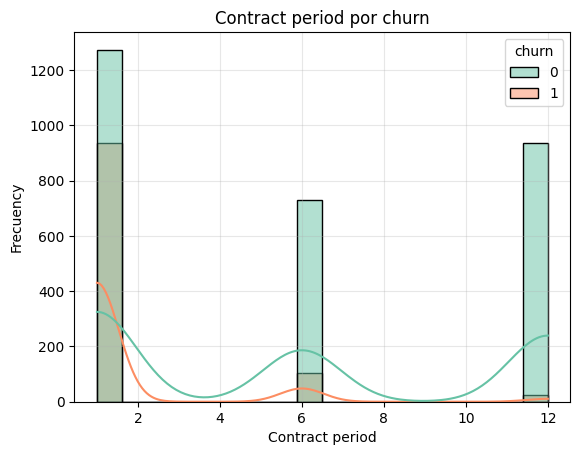

In [107]:
sns.histplot(data=df , x='contract_period' , hue='churn' , kde=True ,palette ='Set2', alpha=0.5)
plt.title('Contract period por churn')
plt.xlabel('Contract period')
plt.ylabel('Frecuency')
plt.grid(True,alpha=0.3)
plt.show()

Se marca la clara tendencia a irse en el mes 1 , aquellos que compran este plan son los que tienden a irse por otro lado los clientes fieles con contratos largos siguen fieles al gimnasio.

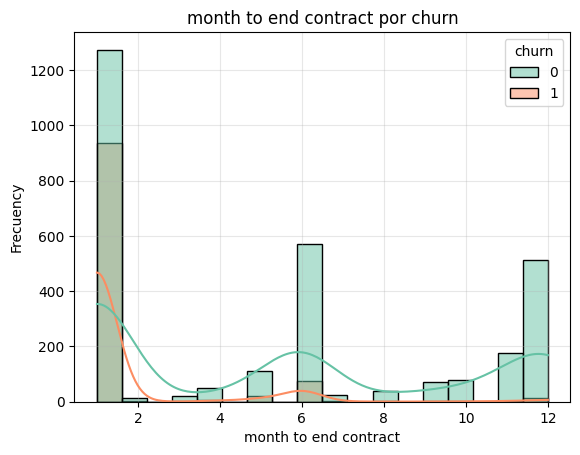

In [106]:
sns.histplot(data=df , x='month_to_end_contract' , hue='churn' , kde=True ,palette ='Set2', alpha=0.5)
plt.title('month to end contract por churn')
plt.xlabel('month to end contract')
plt.ylabel('Frecuency')
plt.grid(True,alpha=0.3)
plt.show()

De igual manera la tendencia es clara los clientes que llevan les queda un mes de contrato tienden a irse.

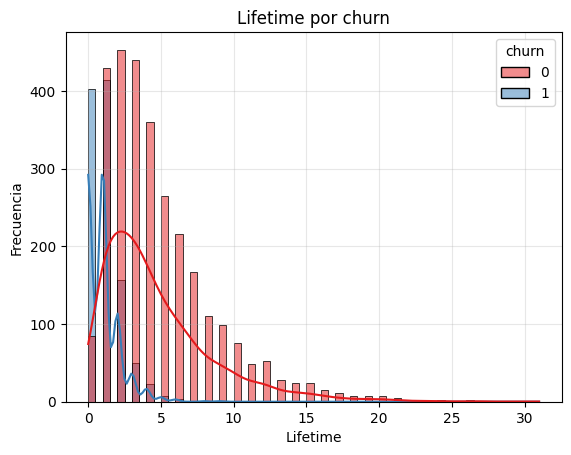

In [102]:
sns.histplot(data=df , x='lifetime' , hue='churn' , kde=True ,palette ='Set1', alpha=0.5)
plt.title('Lifetime por churn')
plt.xlabel('Lifetime')
plt.ylabel('Frecuencia')
plt.grid(True,alpha=0.3)
plt.show()

  Es clave para evidenciar como se dividen los grupos , las personas que llevan 1 mes en el gimnasion claramente tienden a irse.

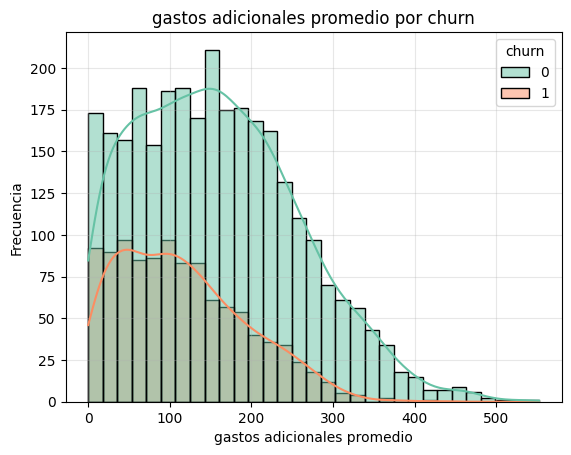

In [103]:
sns.histplot(data=df , x='avg_additional_charges_total' , hue='churn' , kde=True ,palette ='Set2', alpha=0.5)
plt.title('gastos adicionales promedio por churn')
plt.xlabel('gastos adicionales promedio')
plt.ylabel('Frecuencia')
plt.grid(True,alpha=0.3)
plt.show()

Las personas con un volumen de gasto alto son clientes fieles por lo cual podemos hacer dos hipotesis , los precios estan muy altos por eso las personas con bajo ingreso tienden a irse o los servicios adicionales son tan buenos que las personas que los toman se quedan con nosotros.

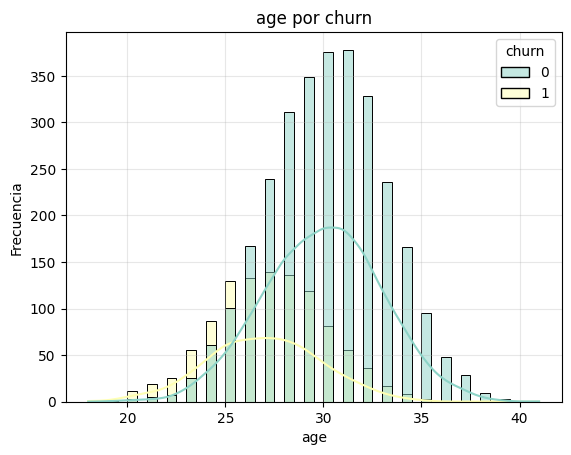

In [104]:
sns.histplot(data=df , x='age' , hue='churn' , kde=True ,palette ='Set3', alpha=0.5)
plt.title('age por churn')
plt.xlabel('age')
plt.ylabel('Frecuencia')
plt.grid(True,alpha=0.3)
plt.show()

No estamos teniendo una buena retencion en el publico joven es muy importante evaluar ese aspecto.

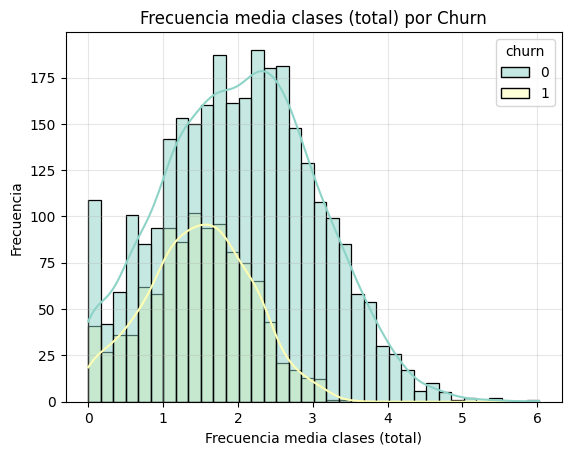

In [108]:
sns.histplot(data=df, x='avg_class_frequency_total', hue='churn', kde=True, palette='Set3', alpha=0.5)
plt.title('Frecuencia media clases (total) por Churn')
plt.xlabel('Frecuencia media clases (total)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

como era de esperarse las personas que mas van al gimnasio no se retiran , podriamos pensar que las personas que van poco puede ser por distancia o tiempo , tambien vemos como las personas que van un o dos dias a la semana de clase terminan retirandose.

### Analisis matriz de distribucion

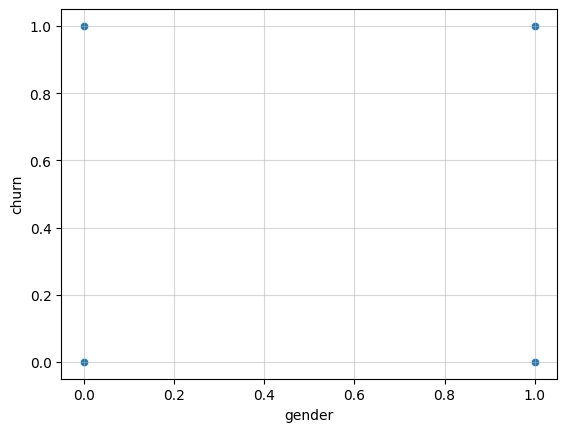

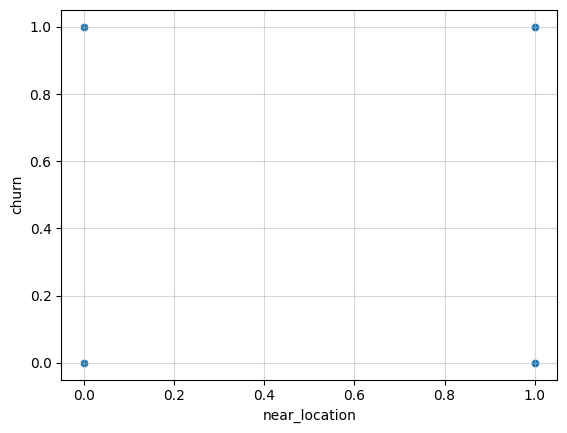

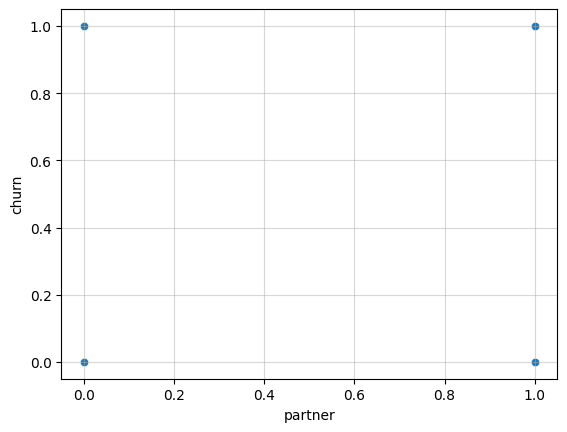

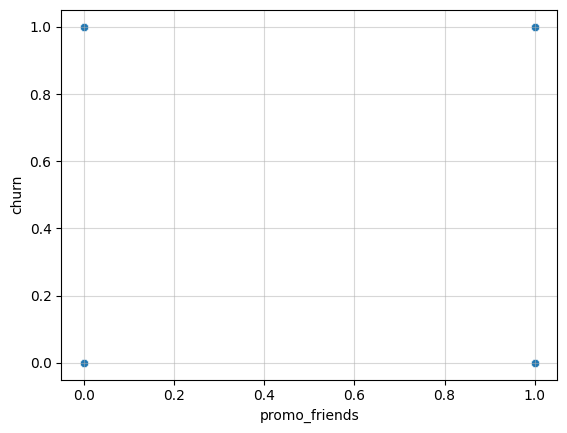

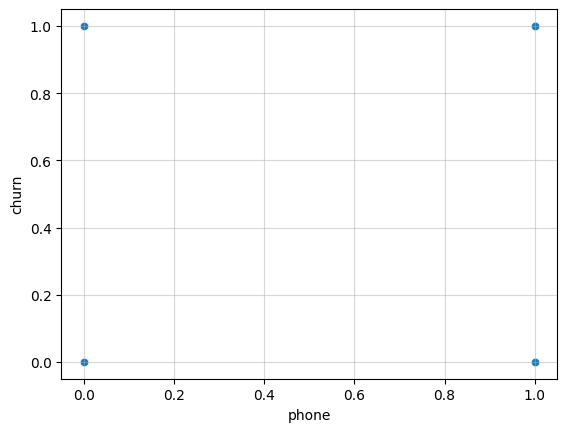

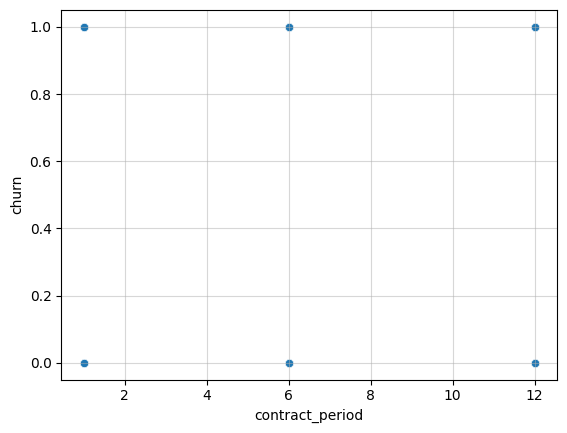

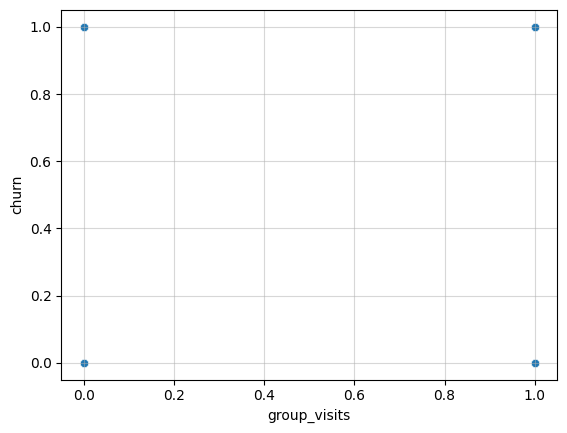

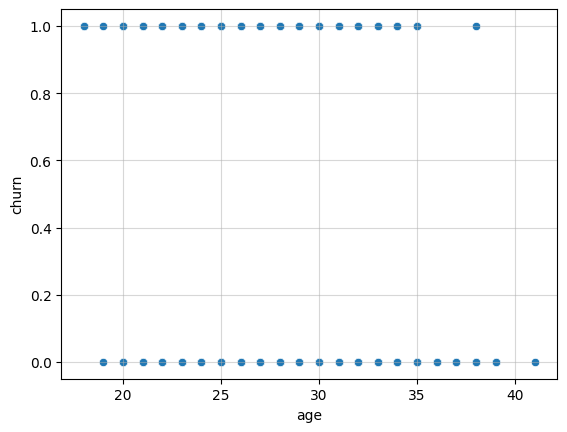

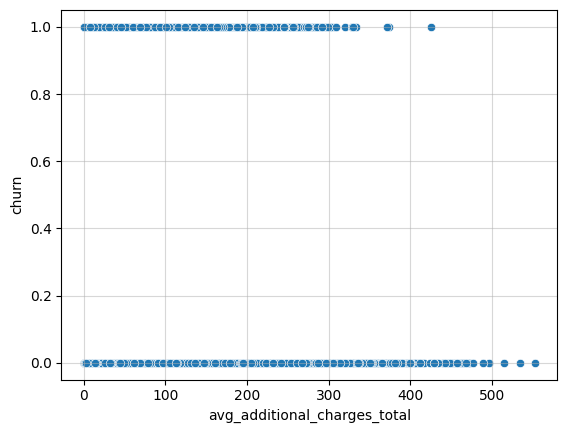

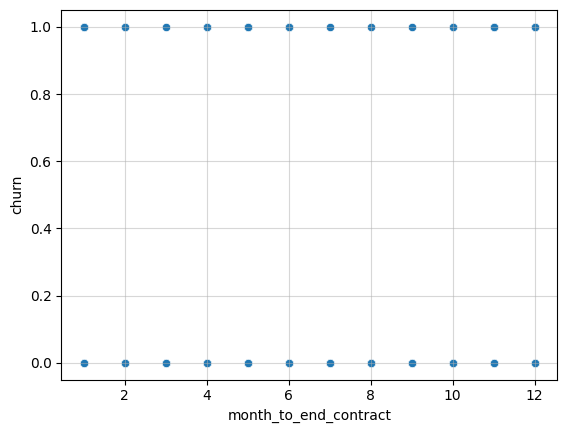

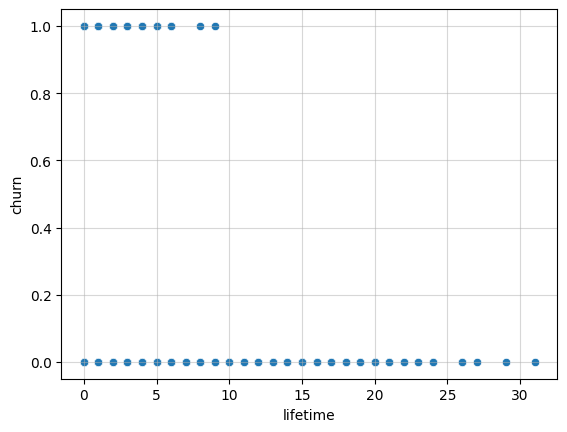

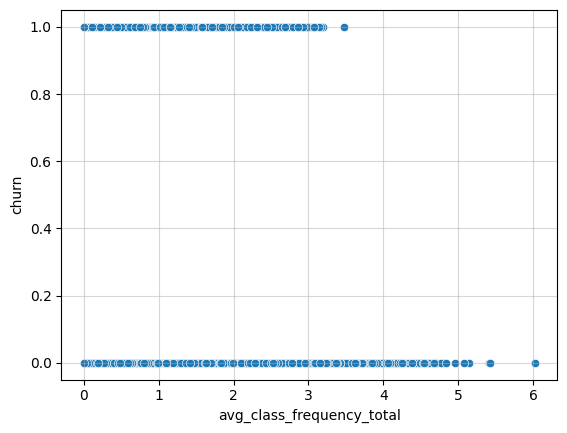

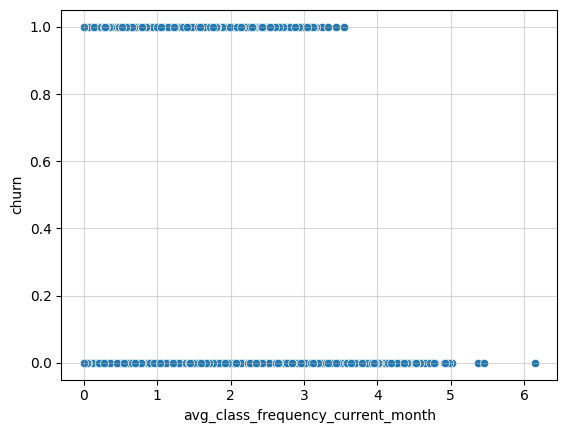

In [83]:
for col in df.drop('churn', axis=1).columns:
    sns.scatterplot(x=df[col], y=df['churn'])
    plt.grid(True , alpha=0.5)
    
    plt.show()

Esta es otra forma de ver lo ya estipulado y nos refuerza lo ya analizado identificando variables clave y relacionadas como con que frecuencia van a clase o cuanto tiempo llevan en el gimnasio.

### Analisis mapa de calor correlaciones

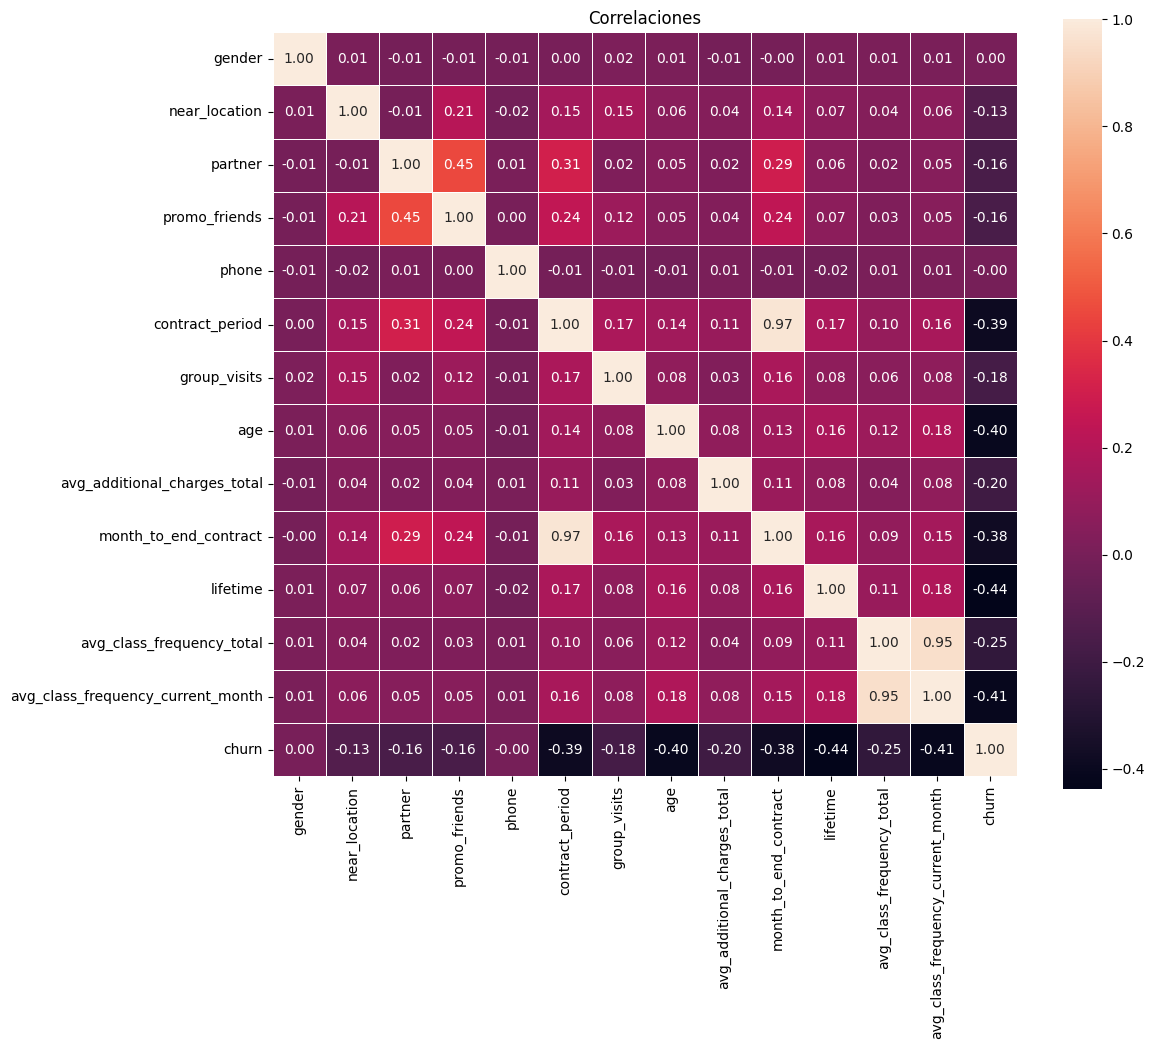

In [84]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            square=True,)

plt.title("Correlaciones")
plt.show()

Las variables con mayor correlacion negativa osea que ayudan a retener al cliente son la edad el el tiempo del contrato , ademas como es consecuencia de los mismo son aquellos que mas usan el servicio de gimnasio , es importante atraer mas jovenes teniendo en cuenta esto e impulsar el tema de que las personas compren planes de prolongada duracion para mejorar la retencion.


## Construir un modelo para predecir la cancelación de usuarios

### Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

In [85]:
X = df.drop('churn',axis=1) # Caracteristicas
y =df['churn'] #Churno lo que queremos predecir

In [86]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state=0)

In [87]:
scaler = StandardScaler()
scaler.fit(X_train) #estandatiza los datos de entrenamiento

StandardScaler()

In [88]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test) #transforma los datos entrenados y los de prueba

### Para regresion logistica

In [89]:
model = LogisticRegression(max_iter=1000 ,random_state=0) #inicialmente sale error por cantidad de iteraciones por tanto se aumenta el rango
model.fit(X_train_st , y_train) 
predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)[:,1]#para predecir cuantos se van a ir

### Para bosque aleatorio

In [90]:
bmodel = RandomForestClassifier(n_estimators=100 , random_state=0)
bmodel.fit(X_train_st , y_train)
bpredictions = bmodel.predict(X_test_st)
bprobabilities = bmodel.predict_proba(X_test_st)[:,1]#para predecir cuantos se van a ir


### Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Compara los modelos. ¿Qué modelo dio mejores resultados?


In [91]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Métricas de clasificación'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [92]:
print_all_metrics(y_test,bpredictions,bprobabilities, title = 'Métricas de random forest:')

Métricas de random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


In [93]:
print_all_metrics(y_test,predictions,probabilities, title = 'Regresion logistica:')

Regresion logistica:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83


A pesar de que presentan metricas muy pero muy similares se toma la decision de implementar Regresion logistica dado que presenta un mejor recall y es mas preciso.

### Curva ROC

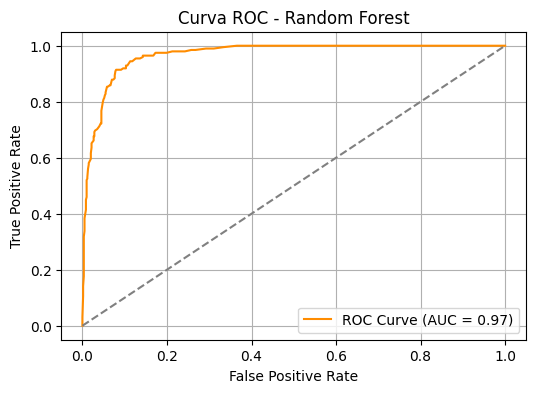

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, bprobabilities)
roc_auc = roc_auc_score(y_test, bprobabilities)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Matriz de confusión

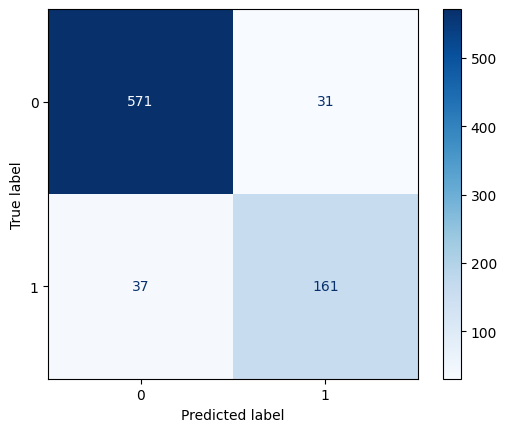

In [100]:
# y_test = etiquetas verdaderas
# bpredictions = predicciones del modelo
cm = confusion_matrix(y_test, bpredictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

Se confirma que el modelo de Random Forest tiene un rendimiento sobresaliente:

Logra una precisión global del 91%.

Identifica correctamente al 81.3% de los usuarios que abandonan.

Su capacidad de distinguir usuarios que se quedan y los que se van está validada por un AUC de 0.97, lo que indica un alto poder predictivo.

Esto sugiere que el modelo es altamente útil para que el gimnasio tome decisiones proactivas, como diseñar estrategias de retención enfocadas en clientes con alta probabilidad de abandono.

## Crear clústeres de usuarios/as

In [ ]:
sc = StandardScaler() #Estandarizar los datos
x_sc = sc.fit_transform(df)
linked = linkage(x_sc, method = 'ward')

### Dendograma

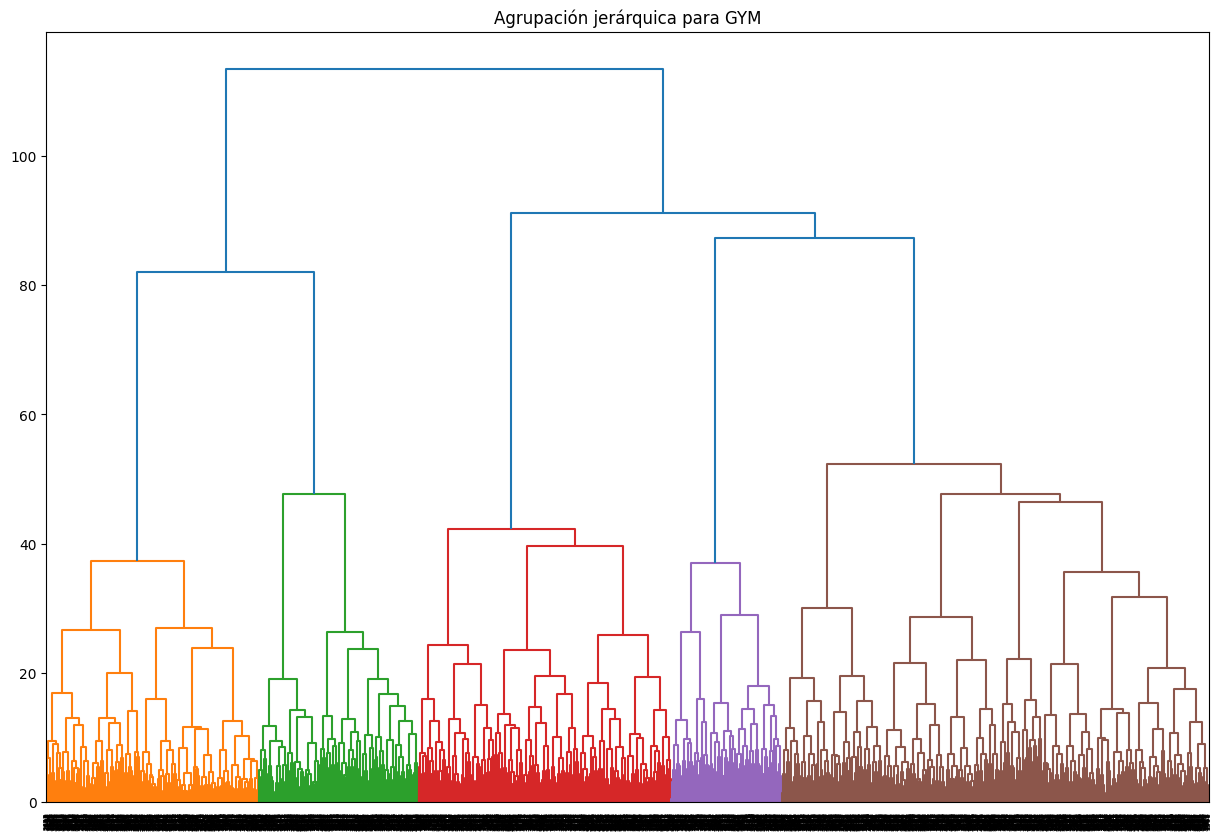

In [ ]:
plt.figure(figsize=(15, 10))  
dendrogram(linked)
plt.title('Agrupación jerárquica para GYM')
plt.show()

Se identifican 5 posibles grupos recomendados según el kluster.

### Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes.

In [ ]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(x_sc)

### Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

In [ ]:
df['cluster'] = labels
df.groupby(['cluster']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.579762,0.828571,0.319048,0.200000,0.905952,2.216667,0.454762,30.045238,154.727206,2.107143,4.696429,2.857494,2.865367,0.007143
1,0.508704,0.764023,0.342360,0.176015,0.903288,1.537718,0.262089,26.927466,114.466105,1.488395,0.975822,1.462487,1.033165,0.998066
2,0.444776,0.937313,0.756716,0.523881,0.916418,10.620896,0.500000,29.979104,162.942920,9.616418,4.762687,2.798993,2.797699,0.005970
3,0.579470,0.942053,0.799669,0.614238,0.879139,10.311258,0.589404,29.715232,161.073949,9.471854,4.420530,1.133827,1.120654,0.029801
4,0.446009,0.819249,0.393192,0.190141,0.908451,2.264085,0.357981,30.072770,156.086483,2.133803,4.793427,1.224667,1.222620,0.001174


En las divisiones de los clusters , se evidencian que factores claves resalta el modelo , por ejemplo el periodo del contrato dividio los grupos , segun el periodo hay dos que se aproximan a 3 uno de 5 meses uno para 1 mes y uno para 11 meses , tambien segmento el tiempo de vida discriminando a los que llevan menos del mes . Y por ultimo dividio el churn hay uno que es muy proximo a 1 , otro a 0.26 que es un cuarto , y el resto si estan mas proximos a 0 osea a quedarse.

### Traza distribuciones de características para los clústeres. ¿Notas algo?


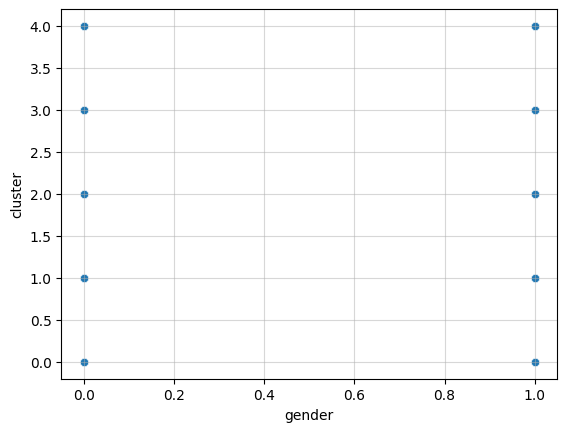

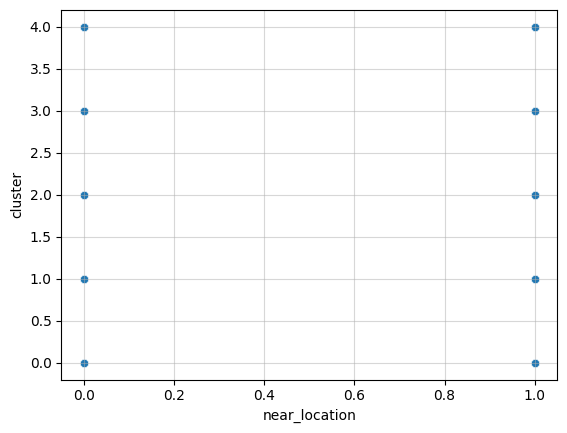

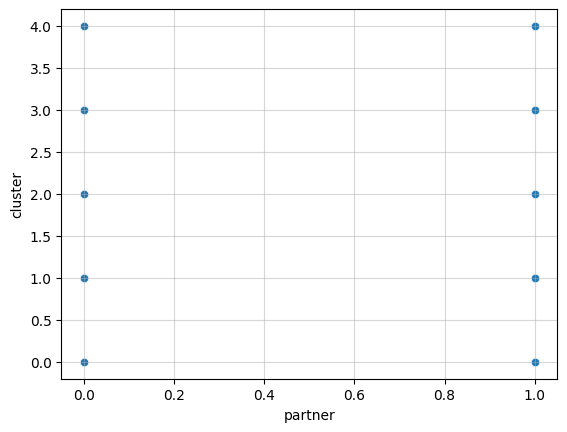

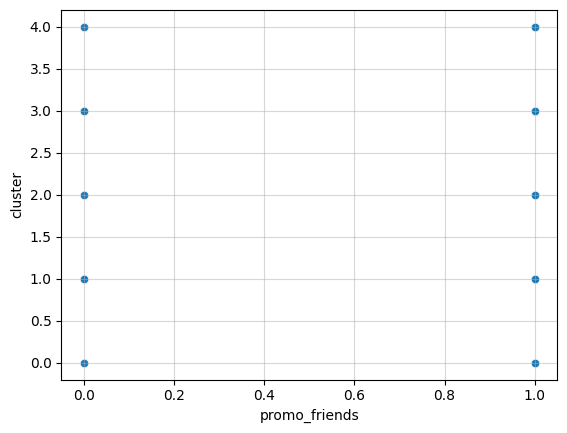

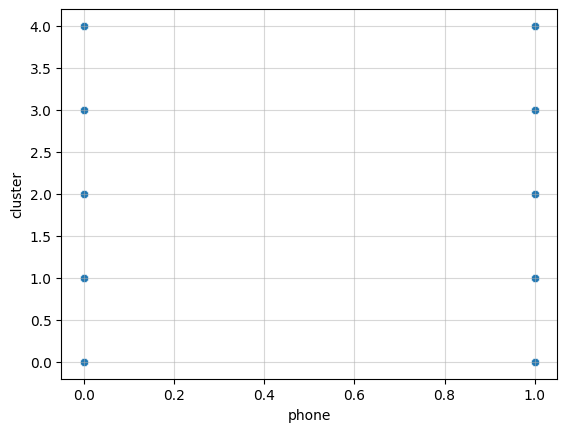

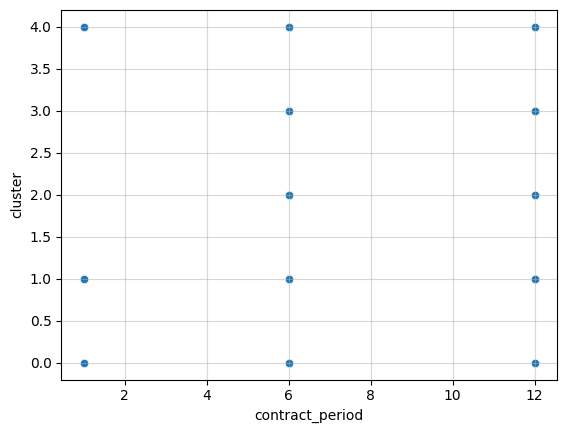

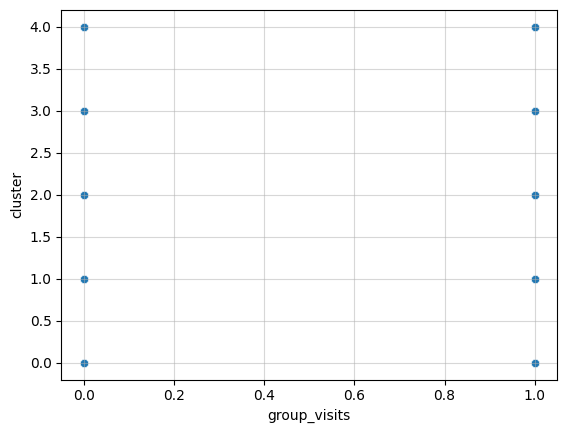

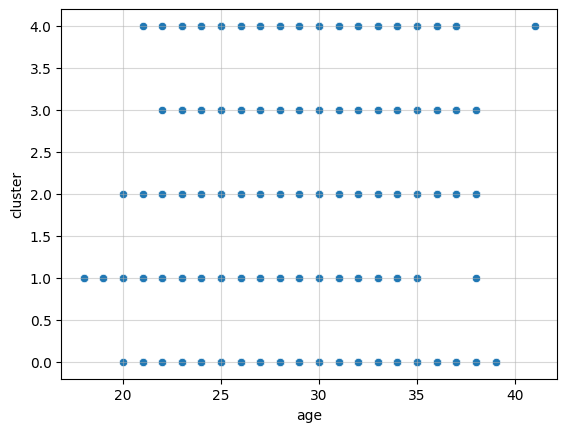

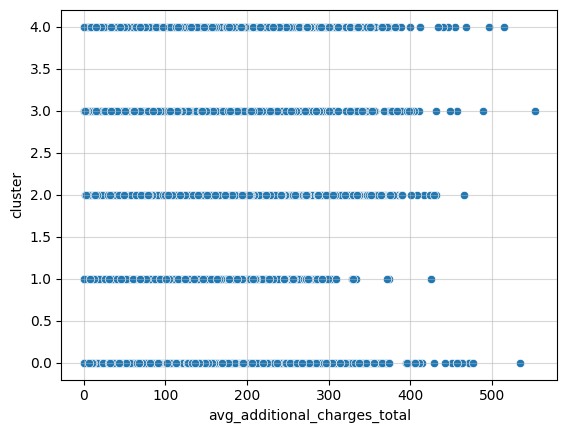

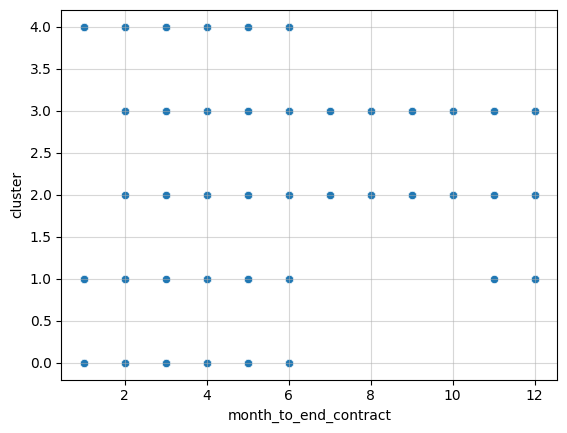

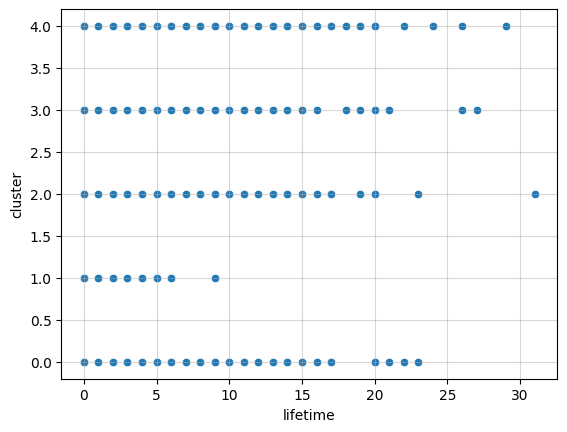

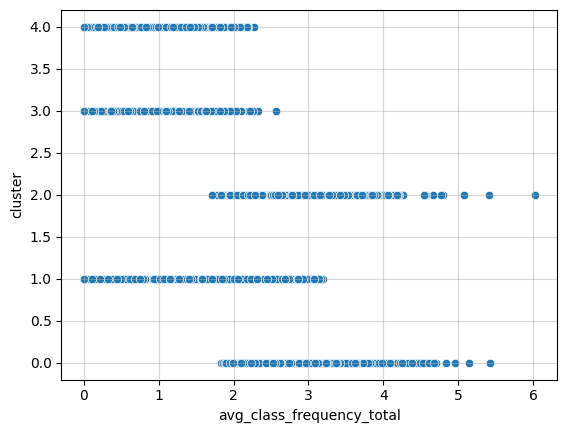

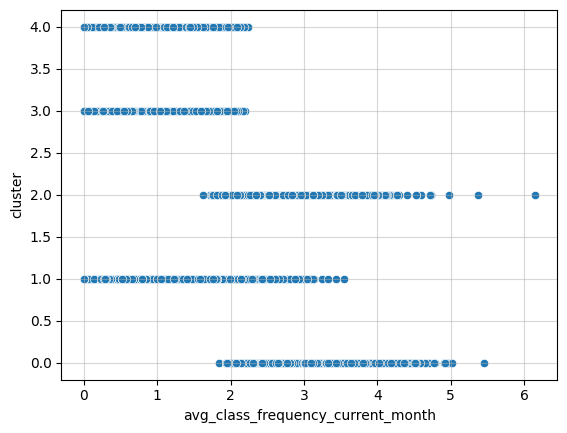

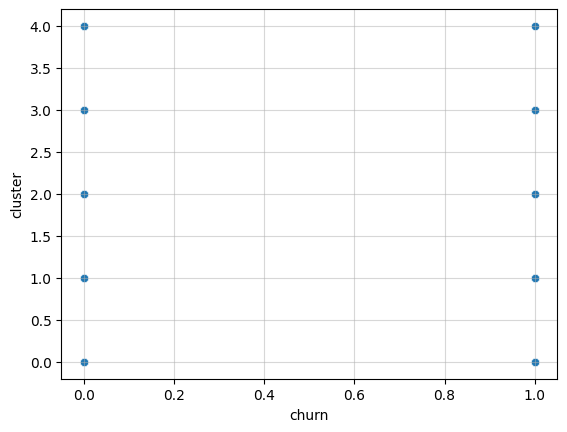

In [ ]:
for col in df.drop('cluster', axis=1).columns:
    sns.scatterplot(x=df[col], y=df['cluster'])
    plt.grid(True , alpha=0.5)
    
    plt.show()

Con estas distribuciones es mucho mas facil analizar los puntos clave , es claro que genero grupo de distribucion segun el periodo de contrato , segmento un poco tambien la edad dejando a los mas jovenes en el cluster 1 , los cual nos permite confirmar una de nuestras hipotesis son los que menos dinero gastan , ademas se evidencia que en relacion con el month to end contract puede que haga falta un periodo de 8 meses dado que las distribuciones toman valor en 6 y luego hasta el mes 10 para los cluster 1 y 0 , en la relacion lifetime y cluster es muy facil de identificar como los integrantes del grupo 1 son los uqe tienen un menor lifetime , en este caso seran nuestro publico objetivo ya con esta informacion analizada a pesar de lo antes mencionado no son los que menos asisten a clase ya que el grupo 0 tiene un menor rate pero como se encontro revisando la relacion con la edad los del grupo 0 son los que tienen mayor edad por lo tanto cosas como las ocupaciones o responsabilidades pueden ser el reflejo el ausentismo . Es clave generar estrategias ya sea de precios o de marketing para retener a nuestro publico joven ya que a pesar de no ser los que mas dinero gastan son la base para crear clientes fieles.

### Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?


In [ ]:
df.groupby('cluster')['churn'].mean()

cluster
0    0.007143
1    0.998066
2    0.005970
3    0.029801
4    0.001174
Name: churn, dtype: float64

## Conclusiones

- Los mas propensos a irse y el publico en el cual se recomienda generar estrategias para aumentar la retencioin es el 1 con un rate de salida de 0.997 muy cercano a irse , llama la atencion de este grupo que es el que tiene menor edad promedio 26 años ademas de esto , son los que menos dinero gastan son los que contratan planes mas cortos o economicos y por alguna razón que hay que entrar a investigar terminan yendose, tambien son los que menos estan afiliados al promo friends o al grupo visitas ,ademas se encuentran lejos del gimnasio tambien podriamos inferir que la locacion en donde se encuentra el gimnasio tiene en su mayoria gente adulta, por lo tanto tambien se puede recomendar realizar jornadas de integracion ademas y hay que resaltar son el grupo con menor rate en lo que consta a partner por lo cual ellos mismos pagan su plan y teniendo en cuenta lo antes mencionado son los que menos dinero gastan.


- En cuanto a lealtad encontramos al grupo 0 hay que idenitificar el buyer persona de este grupo segmentado para buscar atraer mas publico con estas caracteristicas presenta un rate promedio de churn de 0.001156  , en cuanto a los datos que mas destacan son el segundo grupo con mayor indice de partner por tanto no tienen que preocuparse por pagar su gimnasio de su dinero y ademas asegura que tienen un trabajo , en promedio pagan el plan de 3 meses pero esto no afecta ya que lo mas posible es que los planes de alianzas con empresas sean de 3 meses. Son los de mayor edad en promedio con 30 años de media a pesar de todo los visto son los que menor promedio de asistencia a clase tienen con un 1 entrenamiento a la semana asi que no sienten realmente compromiso por ir y no tienen la constancia punto a tener en cuenta ya que no estamos generando lealtad real dado que dependemos de las alianzas con las empresas.

* Comprendiendo el entorno en el cual se destacan las alianzas con empresas las cuales son duraderas , tambien destaca la calidad de los servicios extra del gimnasio , esto comprendiendo que nos ubicamos en una zona en donde las personas son mayores a 27 años por lo tanto en su mayoria se encuentran en edad productiva teniendo la posibilidad de gastar dinero extra en nuestros servicios premium.


* Teniendo nuestro buyer persona hay dos posibilidades aumentar nuestros tratos comerciales con empresas mejorando esta persona y enfocandonos en ese publico que es el que refleja mayor fidelidad , o cambiar nuestra estrategia y generar engadgment en público joven generando promociones por venir en grupos de jovenes , cambiando precios de nuestros planes o haciendo descuentos para jovenes que compren planes mayores a 1 mes.



* Las opciones como tal que se proponen son volvernos lideres en el segmento de empresas con acuerdos de redes de gimnasio para lo cual seria necesario aumentar el equipo comercial y la difusion , por otro lado podriamos tener como target el publico joven generando propaganda y promociones a traves de redes sociales buscando captar este publico . Para cualquier de los dos procesos se propone realizar un plan trimestral dado que podremos observar cambios en las duraciones de los contratos. Una vez se cumpla este plazo repetir la medicion.


* Ya con la segmentacion generada habra que realizar un plan en donde sigamos este camino y mediante un analisis periodico igual a este y con datos de los costos de marketing medir si lo implementado es conveniente.